In [2]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt

## Zero correlation doesn't imply independence

In [2]:
n_trials = 100
x = np.random.uniform(low=-1., high=1., size=n_trials)
y = x**2

In [3]:
np.cov(x,y)

array([[ 0.36020058, -0.00258064],
       [-0.00258064,  0.09769941]])

In [4]:
np.mean(x) # gives you an idea of what zero is

np.float64(-0.026007489258076753)

In [5]:
np.mean(x*y)-np.mean(x)*np.mean(y)

np.float64(-0.0025548382207691983)

Text(0.5, 1.0, '$X\\sim U_{[-1, 1]},Y\\sim X^2$')

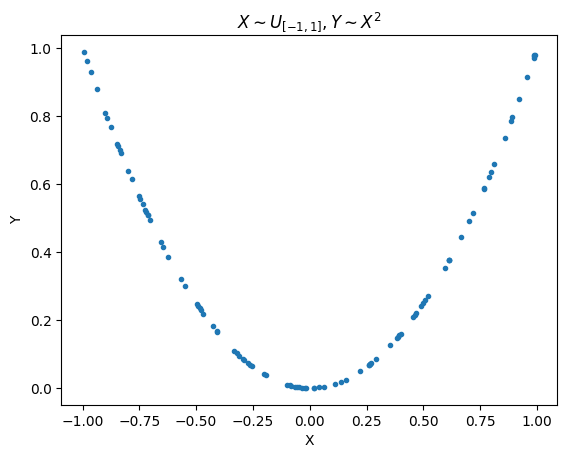

In [6]:
plt.plot(x, y, '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('$X\\sim U_{[-1, 1]},Y\\sim X^2$')

## Moments of the Cauchy distribution

Text(0, 0.5, 'y')

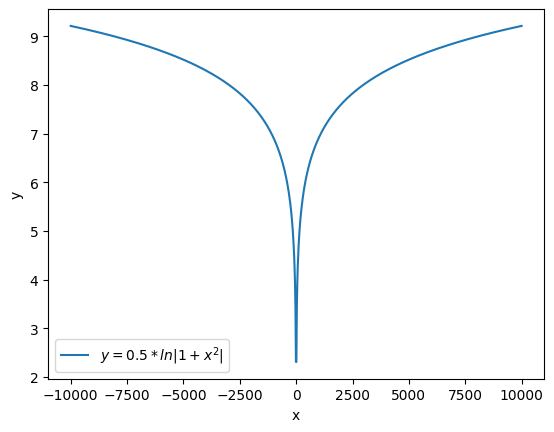

In [11]:
# random plot for the slides
xx = np.linspace(-10000, 10000, 1000)
yy = 0.5*np.log(abs(1+xx**2))

plt.plot(xx, yy, label='$y=0.5*ln|1+x^2|$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

The PDF of the Cauchy distribution is given as follows:
\begin{align}
f(x) &= \frac{1}{\pi\gamma\left[1+\left(\frac{x-x_0}{\gamma}\right)^2\right]}
\end{align}
where $x_0\in\mathbb{R}$ is the location parameter, and $\gamma\in\mathbb{R}^+$ is the scale parameter

### How does the PDF look like?

In [12]:
def my_cauchy_pdf(x, x0, gamma):
    tmp = ((x-x0)/gamma)**2
    tmp = np.pi*gamma*(1+tmp)
    return 1./tmp

Text(0, 0.5, 'PDF')

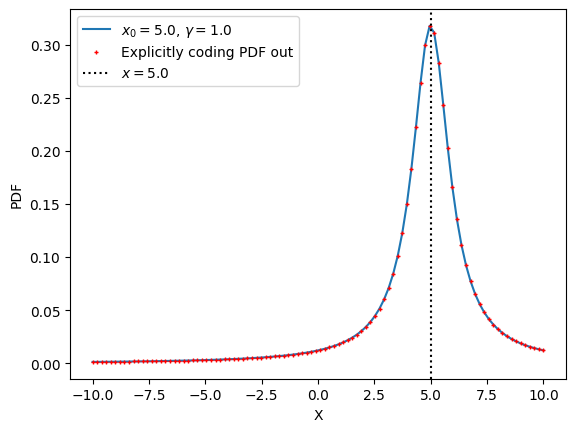

In [13]:
my_loc, my_scale = 5, 1.
test_cauchy = sps.cauchy(loc=my_loc, scale=my_scale)
xx = np.linspace(-10, 10, 100)

plt.plot(xx, test_cauchy.pdf(xx), label=f'$x_0=${my_loc:.1f}, $\gamma=${my_scale:.1f}')
plt.plot(xx, my_cauchy_pdf(xx, my_loc, my_scale), 'r+', ms=3, label=f'Explicitly coding PDF out')
plt.axvline(my_loc, label=f'$x=${my_loc:.1f}', ls=':', c='k')
plt.legend()
plt.xlabel('X')
plt.ylabel('PDF')

## Sample mean and standard deviation

In [14]:
n_samples = int(1e4)

samples = sps.cauchy.rvs(size=n_samples)

In [15]:
cumulative_mean = np.cumsum(samples)/np.arange(1, n_samples+1)

In [16]:
cumulative_std_loop = np.zeros_like(samples)
for ii in range(n_samples):
    cumulative_std_loop[ii] = np.std(samples[:ii+1])

Instead of using `np.std` to compute the standard deviation in a for loop, I use the following property so that I can use the `np.cumsum` function again.
\begin{align}
\sigma&\equiv\sqrt{\mathbb{E}\left[(X-\mu)^2\right]}\\
&=\sqrt{\mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2}
\end{align}

In [17]:
samples_squared = samples**2.
tmp = np.cumsum(samples_squared)/np.arange(1, n_samples+1)
cumulative_std = np.sqrt(tmp - cumulative_mean**2.)

/tmp/ipykernel_8675/270267738.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


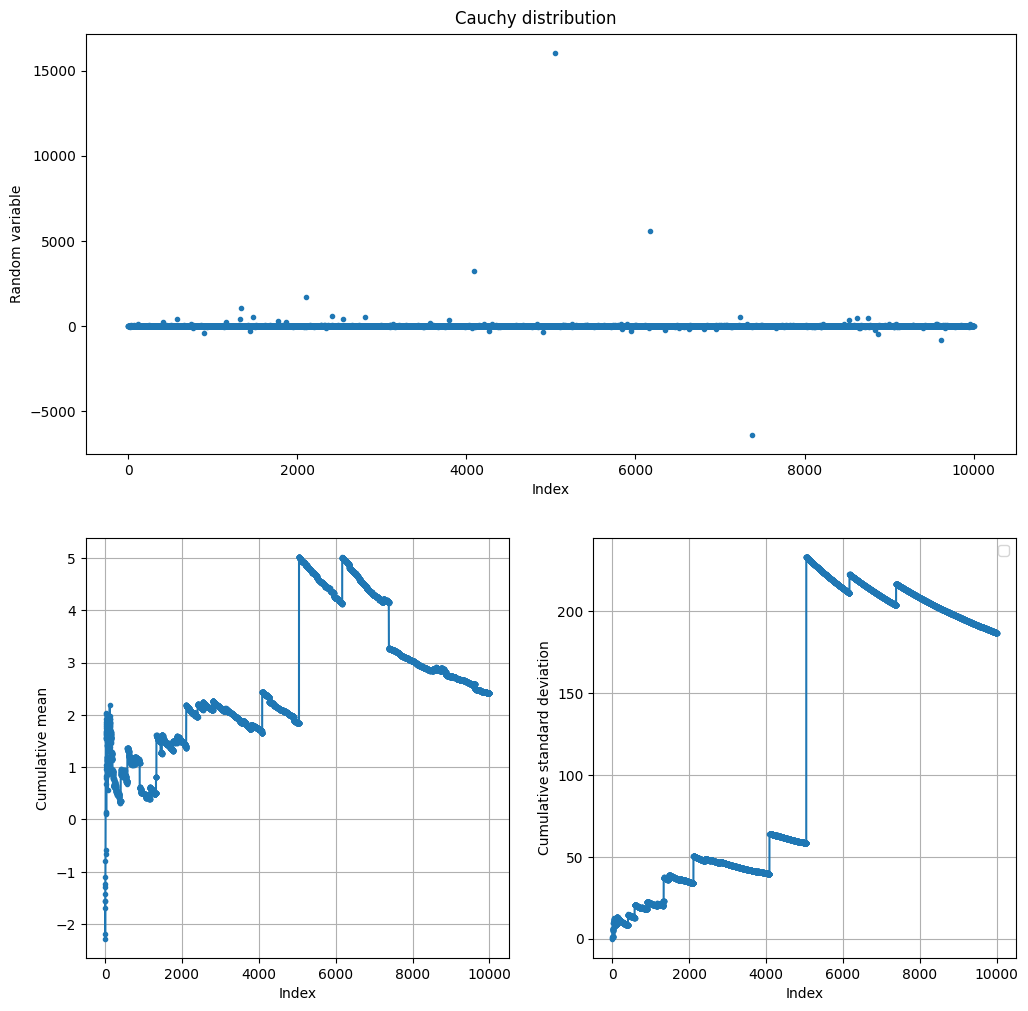

In [18]:
plt.figure(figsize=(12, 12))
plt.suptitle('Cauchy distribution', y=0.9)
plt.subplot(211)
plt.plot(samples, '.')
plt.xlabel('Index')
plt.ylabel('Random variable')

plt.subplot(223)
plt.plot(cumulative_mean, '.-')
plt.xlabel('Index')
plt.ylabel('Cumulative mean')
plt.grid()

plt.subplot(224)
plt.plot(cumulative_std, '.-')
#plt.plot(cumulative_std_loop, '.', label='Computed in for loop')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Cumulative standard deviation')
plt.grid()